In [426]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

data = pd.read_csv("Titanic-Dataset.csv")

In [427]:
data.isna().sum().sort_values(ascending=False)
total_persons = data.shape[0]

In [428]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [429]:
data.drop(['Name', 'PassengerId', 'Cabin'], axis=1, inplace=True)

In [430]:
def factorize_columns(data, columns_to_factorize):
    encoded_mappings = {}

    for column in columns_to_factorize:
        codes, unique_values = pd.factorize(data[column])
        data[column] = codes
        encoded_mappings[column] = {'codes': codes, 'unique_values': unique_values}

    return data, encoded_mappings

In [431]:

def replace_undefined_with_mode(data, column_name):
    if column_name in data.columns:
        mode_value = data[column_name].mode()[0]  # Get the mode (most frequent value)
        # Replace "NaN" values with the mode
        data[column_name] = data[column_name].replace(np.nan, mode_value)
    else:
        print(f"The column '{column_name}' does not exist in the DataFrame.")
    return data

In [432]:
data, mappings = factorize_columns(data, data.columns)
for col in data.columns:
    data = replace_undefined_with_mode(data, col)
    

In [433]:
data.isna().sum().sort_values(ascending=False)

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

In [434]:
y = data[['Survived']]
X = data.drop(['Survived'],axis=1)


Xtrain, Xrest, ytrain, yrest = train_test_split(X, y, test_size=0.2)
Xval, Xtest, yval, ytest = train_test_split(Xrest, yrest, test_size=0.5)
lr = LinearRegression()
lr.fit(Xtrain, ytrain)

LinearRegression()

Text(0, 0.5, 'Features')

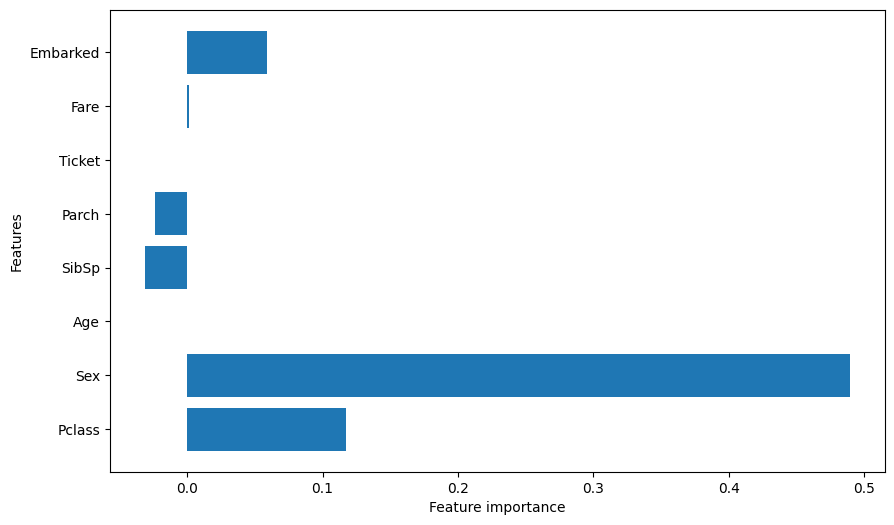

In [435]:
columns = Xtrain.columns.values.tolist()
coefs = lr.coef_.ravel().tolist()

plt.figure(figsize = (10,6))
plt.barh(columns, coefs)
plt.xlabel("Feature importance")
plt.ylabel("Features")

Text(0, 0.5, 'Features')

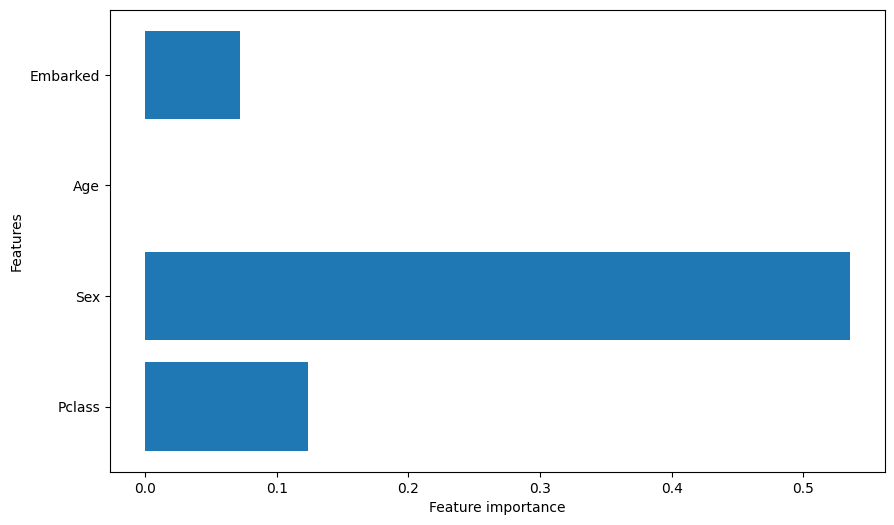

In [436]:
data = data.drop(['Parch', 'SibSp', 'Ticket', 'Fare'], axis=1)

y = data[['Survived']]
X = data.drop(['Survived'],axis=1)


Xtrain, Xrest, ytrain, yrest = train_test_split(X, y, test_size=0.5)

lr = LinearRegression()
lr.fit(Xtrain, ytrain)
columns = Xtrain.columns.values.tolist()
coefs = lr.coef_.ravel().tolist()

plt.figure(figsize = (10,6))
plt.barh(columns, coefs)
plt.xlabel("Feature importance")
plt.ylabel("Features")

In [437]:
def calculate_relative_error(rmse, range):
    relative_error = float((rmse/range.item()) * 100)

    return relative_error

def RMSE(y,y_pred):
    mse=mean_squared_error(y, y_pred)
    return np.sqrt(mse)

y_range = y.max() - y.min()

y_pred_lr = lr.predict(Xtrain)
rmse_val = RMSE(ytrain, y_pred_lr)
relative_error = calculate_relative_error(rmse_val, y_range)

print("Relative error:",relative_error)

Relative error: 39.594524254006735
